### Problem 5 – DIGITS/PCA

•	We will do 2-D PCA projection of EACH class separately.<br>
•	Draw 10 scatter plots, one for each class.<br>
•	In each scatter plot, first do a 2-D PCA and plot them on a scatter plot<br>
•	If too much data, then sample 200 points from each class for the visualization<br>
•	Comment on any interesting patterns – e.g. do you see a “higher spread” in digits that are written in multiple ways?<br>

DataSet: DIGITS: https://www.kaggle.com/c/Higgs-boson

Submitted By: Amit Kumar Sharma (PGID: 71721079)

In [1]:
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import numpy as np
from numpy import arange
import pandas as pd

import sklearn
from sklearn.decomposition import PCA

### Data Loading and Plotting

In [2]:
digit_train = pd.read_csv("/Users/a5sharma/Downloads/DataSet/Kaggle/digit-recognizer/train.csv")

In [3]:
digit_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
## print top 10 rows of the dataset
digit_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


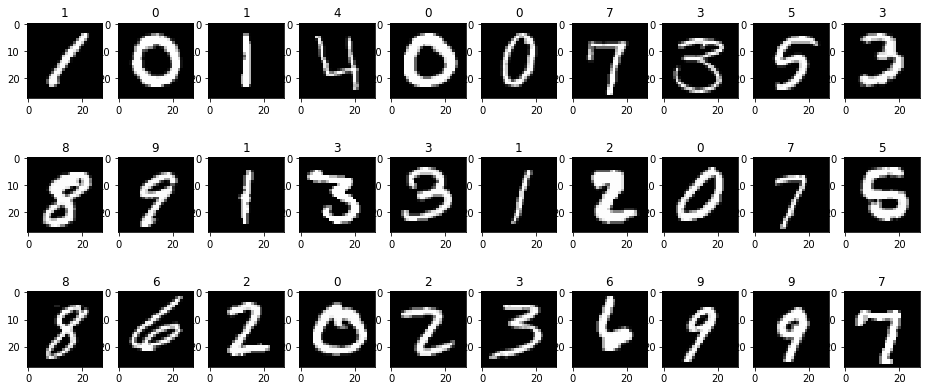

In [5]:
X_train = digit_train.iloc[:,1:].values.astype('float32')
train_features_images=X_train.reshape(X_train.shape[0],28,28)
labels = digit_train["label"].values

def show_images(features_images,labels,start, howmany):
    fig = plt.figure( figsize=(16,7) )
    for i in range(start, start+howmany):
        fig.add_subplot(3,10,i+1, title='Digit: ' )
        plt.imshow(features_images[i], cmap=plt.get_cmap('gray'))
        plt.title(labels[i])
    plt.show()
    
show_images(train_features_images, labels, 0, 30)

### PCA Components

In [6]:
#Sampling

digit_0_200= digit_train[digit_train.label==0]
digit_1_200= digit_train[digit_train.label==1]
digit_2_200= digit_train[digit_train.label==2]
digit_3_200= digit_train[digit_train.label==3]
digit_4_200= digit_train[digit_train.label==4]
digit_5_200= digit_train[digit_train.label==5]
digit_6_200= digit_train[digit_train.label==6]
digit_7_200= digit_train[digit_train.label==7]
digit_8_200= digit_train[digit_train.label==8]
digit_9_200= digit_train[digit_train.label==9]

In [12]:
digit_0_200.shape

(4132, 785)

In [11]:
X_train.shape

(4132, 784)

In [8]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.explained_variance_.shape

(784,)

In [10]:
pca.components_.shape

(784, 784)

Text(0.5,1,'2D Projection for digit 0')

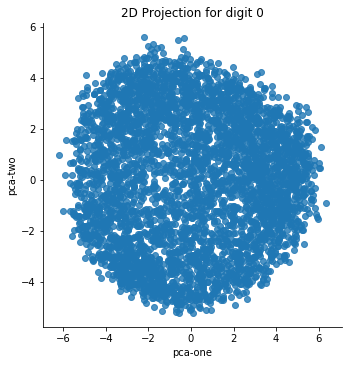

In [7]:
## Set the seed
np.random.seed(1234)
X_train = digit_0_200.iloc[:,1:]/255.0
## Generate 2 Principle Components
pca = PCA(n_components = 2)
pca.fit(X_train)
X_train1 = pd.DataFrame(pca.transform(X_train),columns=["pca-one","pca-two"])
## For plotting
sns.lmplot('pca-one','pca-two',data=X_train1,fit_reg=False)
plt.title("2D Projection for digit 0")

Explained cumulative variation for 2 principal components: [0.34945803 0.49645004]


Text(0.5,1,'2D Projection for digit 1')

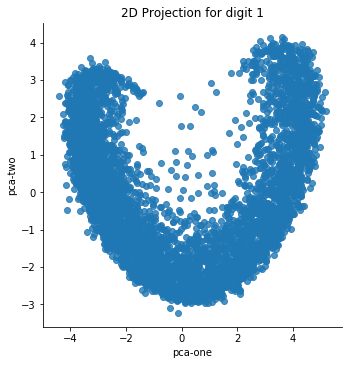

In [78]:
## Set the seed
np.random.seed(1234)
X_train = digit_1_200.iloc[:,1:]/255.0
## Generate 2 Principle Components
pca = PCA(n_components = 2)
pca.fit(X_train)
print('Explained cumulative variation for 2 principal components: {0}'.format(pca.explained_variance_ratio_.cumsum()))
X_train1 = pd.DataFrame(pca.transform(X_train),columns=["pca-one","pca-two"])
## For plotting

sns.lmplot('pca-one','pca-two',data=X_train1,fit_reg=False)
plt.title("2D Projection for digit 1")

Explained cumulative variation for 2 principal components: [0.1209662  0.19960576]


Text(0.5,1,'2D Projection for digit 2')

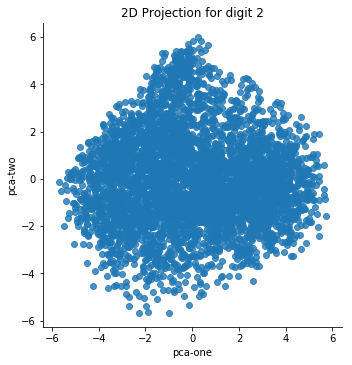

In [79]:
## Set the seed
np.random.seed(1234)
X_train = digit_2_200.iloc[:,1:]/255.0
## Generate 2 Principle Components
pca = PCA(n_components = 2)
pca.fit(X_train)
print('Explained cumulative variation for 2 principal components: {0}'.format(pca.explained_variance_ratio_.cumsum()))
X_train1 = pd.DataFrame(pca.transform(X_train),columns=["pca-one","pca-two"])
## For plotting

sns.lmplot('pca-one','pca-two',data=X_train1,fit_reg=False)
plt.title("2D Projection for digit 2")

Explained cumulative variation for 2 principal components: [0.12416303 0.21767979]


Text(0.5,1,'2D Projection for digit 3')

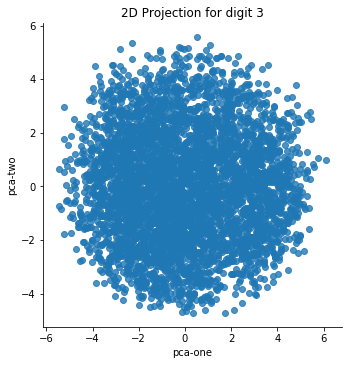

In [80]:
## Set the seed
np.random.seed(1234)
X_train = digit_3_200.iloc[:,1:]/255.0
## Generate 2 Principle Components
pca = PCA(n_components = 2)
pca.fit(X_train)
print('Explained cumulative variation for 2 principal components: {0}'.format(pca.explained_variance_ratio_.cumsum()))
X_train1 = pd.DataFrame(pca.transform(X_train),columns=["pca-one","pca-two"])
## For plotting

sns.lmplot('pca-one','pca-two',data=X_train1,fit_reg=False)
plt.title("2D Projection for digit 3")

Explained cumulative variation for 2 principal components: [0.1199458  0.21792323]


Text(0.5,1,'2D Projection for digit 4')

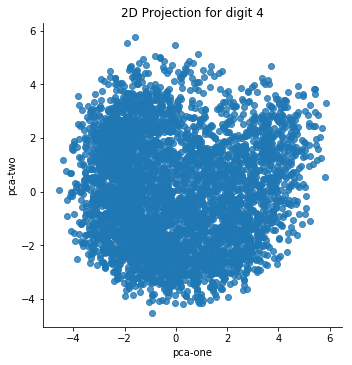

In [81]:
## Set the seed
np.random.seed(1234)
X_train = digit_4_200.iloc[:,1:]/255.0
## Generate 2 Principle Components
pca = PCA(n_components = 2)
pca.fit(X_train)
print('Explained cumulative variation for 2 principal components: {0}'.format(pca.explained_variance_ratio_.cumsum()))
X_train1 = pd.DataFrame(pca.transform(X_train),columns=["pca-one","pca-two"])
## For plotting

sns.lmplot('pca-one','pca-two',data=X_train1,fit_reg=False)
plt.title("2D Projection for digit 4")

Explained cumulative variation for 2 principal components: [0.16810286 0.26368132]


Text(0.5,1,'2D Projection for digit 5')

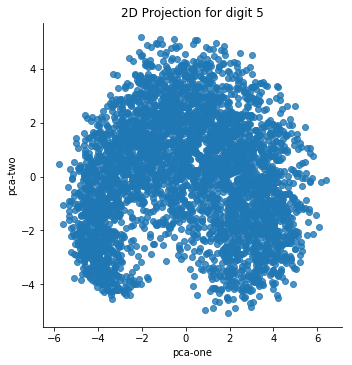

In [82]:
## Set the seed
np.random.seed(1234)
X_train = digit_5_200.iloc[:,1:]/255.0
## Generate 2 Principle Components
pca = PCA(n_components = 2)
pca.fit(X_train)
print('Explained cumulative variation for 2 principal components: {0}'.format(pca.explained_variance_ratio_.cumsum()))
X_train1 = pd.DataFrame(pca.transform(X_train),columns=["pca-one","pca-two"])
## For plotting

sns.lmplot('pca-one','pca-two',data=X_train1,fit_reg=False)
plt.title("2D Projection for digit 5")

Explained cumulative variation for 2 principal components: [0.17153925 0.26680939]


Text(0.5,1,'2D Projection for digit 6')

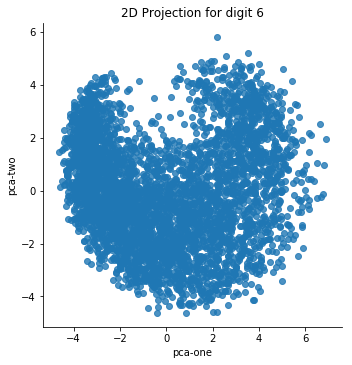

In [83]:
## Set the seed
np.random.seed(1234)
X_train = digit_6_200.iloc[:,1:]/255.0
## Generate 2 Principle Components
pca = PCA(n_components = 2)
pca.fit(X_train)
print('Explained cumulative variation for 2 principal components: {0}'.format(pca.explained_variance_ratio_.cumsum()))
X_train1 = pd.DataFrame(pca.transform(X_train),columns=["pca-one","pca-two"])
## For plotting

sns.lmplot('pca-one','pca-two',data=X_train1,fit_reg=False)
plt.title("2D Projection for digit 6")

Explained cumulative variation for 2 principal components: [0.1591728  0.26811527]


Text(0.5,1,'2D Projection for digit 7')

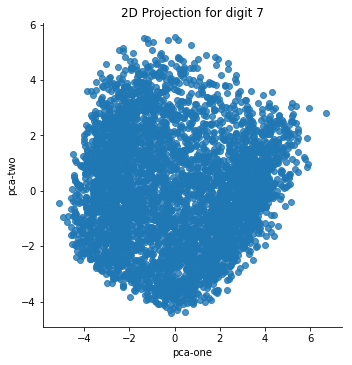

In [86]:
## Set the seed
np.random.seed(1234)
X_train = digit_7_200.iloc[:,1:]/255.0
## Generate 2 Principle Components
pca = PCA(n_components = 2)
pca.fit(X_train)
print('Explained cumulative variation for 2 principal components: {0}'.format(pca.explained_variance_ratio_.cumsum()))
X_train1 = pd.DataFrame(pca.transform(X_train),columns=["pca-one","pca-two"])
## For plotting

sns.lmplot('pca-one','pca-two',data=X_train1,fit_reg=False)
plt.title("2D Projection for digit 7")

Explained cumulative variation for 2 principal components: [0.1230431  0.20115601]


Text(0.5,1,'2D Projection for digit 8')

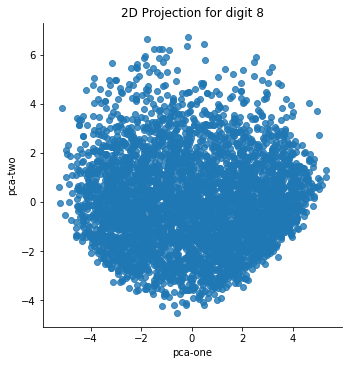

In [87]:
## Set the seed
np.random.seed(1234)
X_train = digit_8_200.iloc[:,1:]/255.0
## Generate 2 Principle Components
pca = PCA(n_components = 2)
pca.fit(X_train)
print('Explained cumulative variation for 2 principal components: {0}'.format(pca.explained_variance_ratio_.cumsum()))
X_train1 = pd.DataFrame(pca.transform(X_train),columns=["pca-one","pca-two"])
## For plotting

sns.lmplot('pca-one','pca-two',data=X_train1,fit_reg=False)
plt.title("2D Projection for digit 8")

Explained cumulative variation for 2 principal components: [0.15800104 0.25740873]


Text(0.5,1,'2D Projection for digit 9')

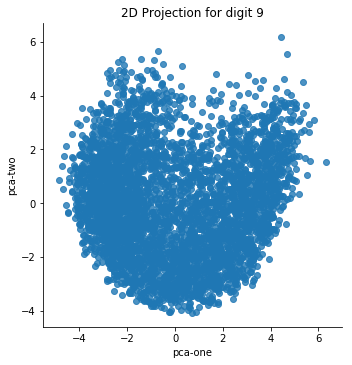

In [88]:
## Set the seed
np.random.seed(1234)
X_train = digit_9_200.iloc[:,1:]/255.0
## Generate 2 Principle Components
pca = PCA(n_components = 2)
pca.fit(X_train)
print('Explained cumulative variation for 2 principal components: {0}'.format(pca.explained_variance_ratio_.cumsum()))
X_train1 = pd.DataFrame(pca.transform(X_train),columns=["pca-one","pca-two"])
## For plotting

sns.lmplot('pca-one','pca-two',data=X_train1,fit_reg=False)
plt.title("2D Projection for digit 9")

Yes, we can see high spread in digits 0, 2, 4, 8 and 7 because these digits can be written in multiple ways.